In [ ]:
# forecast, mFilter 패키지 설치
install.packages('forecast')
install.packages('mFilter')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# forecast, mFilter 패키지 호출
library(forecast)
library(mFilter)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
# 데이터는 국가통계포털(kosis.kr)의 주제별 통계 -> 국민계정 -> 국민계정(2015년 기준) -> 경제활동별, 지출항목별 규모 -> 국내총생산에 대한 지출(계절조정, 실질, 분기), 국내총생산에 대한 지출(원계열, 실질, 분기 및 연간) 에서 조회하여 다운로드 받았습니다.
# 다운로드 받은 계절조정, 원계열 데이터는 엑셀에서 합한 후, 컬럼 이름을 영어로 변경하였고, github에 저장하였습니다.
# github에 저장해둔 데이터 파일을 불러옵니다.
url = "https://raw.githubusercontent.com/barkle2/KNOU/master/%5B4-1%5D%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0/consumption.csv"
gdp_ts = read.csv(url, header=TRUE)

In [ ]:
df = data.frame(gdp_ts)
head(df)

,time,consumption,consumption_sa
,<chr>,<dbl>,<dbl>
1,1982 Q1,33938.4,33895.4
2,1982 Q2,33681.7,34736.7
3,1982 Q3,34259.8,35476.7
4,1982 Q4,38083.8,35854.9
5,1983 Q1,36814.5,36965.2
6,1983 Q2,36851.0,37881.2


In [ ]:
# 그래프 크기 조정 옵션 등
options(warn=-1, repr.plot.width=10, repr.plot.height=5)

In [ ]:
library(ggplot2)

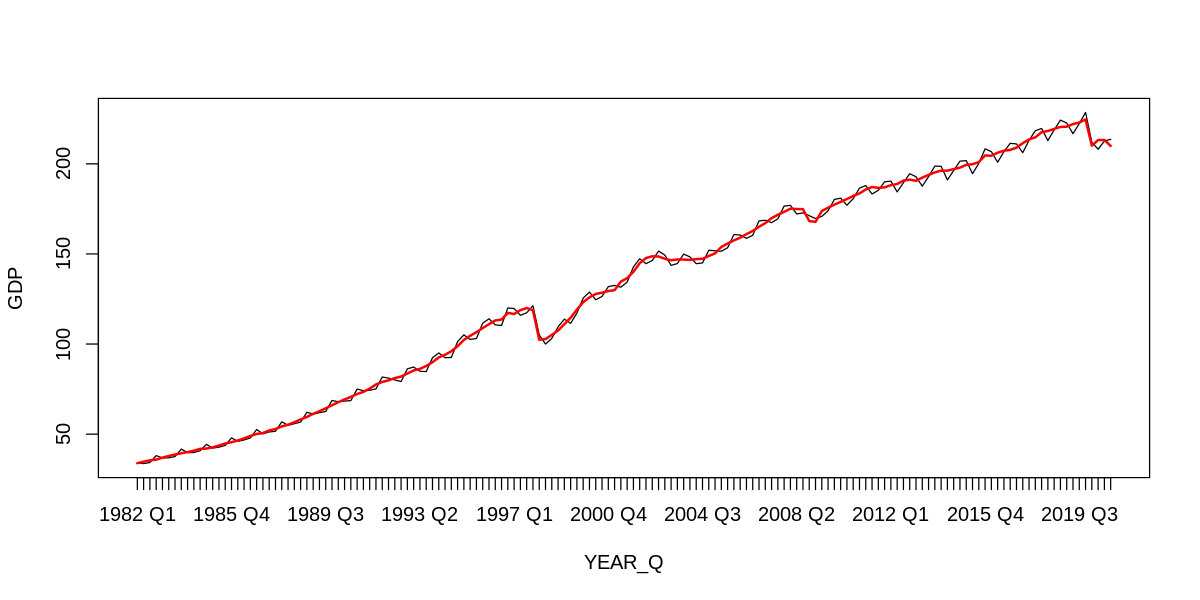

In [ ]:
# 시계열도표 그리기
x_title = gdp_ts[,1]
gdp = gdp_ts[,2]/1000
gdp_sa = gdp_ts[,3]/1000

plot(gdp, xaxt="n", xlab="YEAR_Q", ylab="GDP", type="l", col="black")
axis(1, at=seq(1,156), labels=x_title)
lines(gdp_sa, col="red", lwd=2)

실질 민간소비 GDP의 시계열도표의 특징은 다음과 같습니다.
1. 추세변동: GDP 지속적으로 상승하고 있는 추세를 확인할 수 있습니다.
2. 순환변동: 이 그래프에서는 특별한 순환변동이 보이지 않습니다.
3. 계절변동: 원계열 자료를 보면 계절변동이 존재하는 것을 볼 수 있습니다. 
  - 1~4분기 중에서 2분기 GDP 가장 낮고, 4분기 GDP가 가장 높은 경향이 있습니다.
4. 불규칙변동: 1998년, 2003년, 2008년, 2020년에 각각 민간소비에 부정적 충격을 주었던 변동이 있는 것으로 판단되며, 2020년의 변동은 1998년의 변동과 비슷한 정도의 영향을 준 것으로 보입니다.

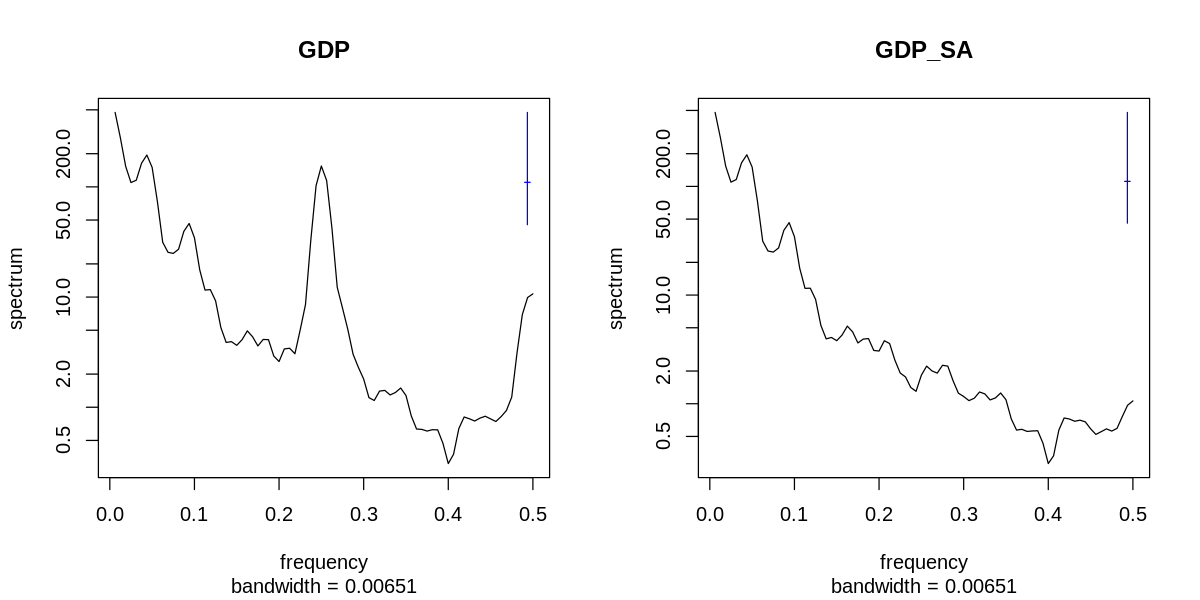

In [ ]:
par(mfrow=c(1,2))
spectrum(gdp, spans=c(3,3), main="GDP")
spectrum(gdp_sa, spans=c(3,3), main="GDP_SA")
#spectrum(na.omit(diff(log(gdp))), spans=c(3,3), main="diff(log(GDP))")
#spectrum(na.omit(diff(log(gdp_sa))), spans=c(3,3), main="diff(log(GDP_SA))")


GDP 원계열의 스펙트럼의 특징은 다음과 같습니다.
- 저주파수에서 큰 값을 가지는데, 이는 추세변동요인이 존재한다는 것을 의미합니다.
- frequency=0.25 부분의 값이 큰 것은 계절변동요인의 존재를 의미합니다. 계절변동요인은 원래 주기가 1이나 분기별 데이터이기 때문에 주기가 0.25부분이 계절변동요인을 나타냅니다.

GDP 계절조정계열의 스펙트럼의 특징은 다음과 같습니다.
- 원계열과 마찬가지로 저주파수의 큰 값은 추세변동요인이 존재한다는 의미입니다.
- frequency=0.25 부분의 큰 값이 존재하지 않는데, 이는 계절조정을 통해 계절변동요인이 제거된 결과로 볼 수 있습니다.

In [ ]:
# GDP 원계열의 로그계열
gdp_log = log(gdp)
# GDP 원계열의 로그차분계열
gdp_log_diff = diff(log(gdp))

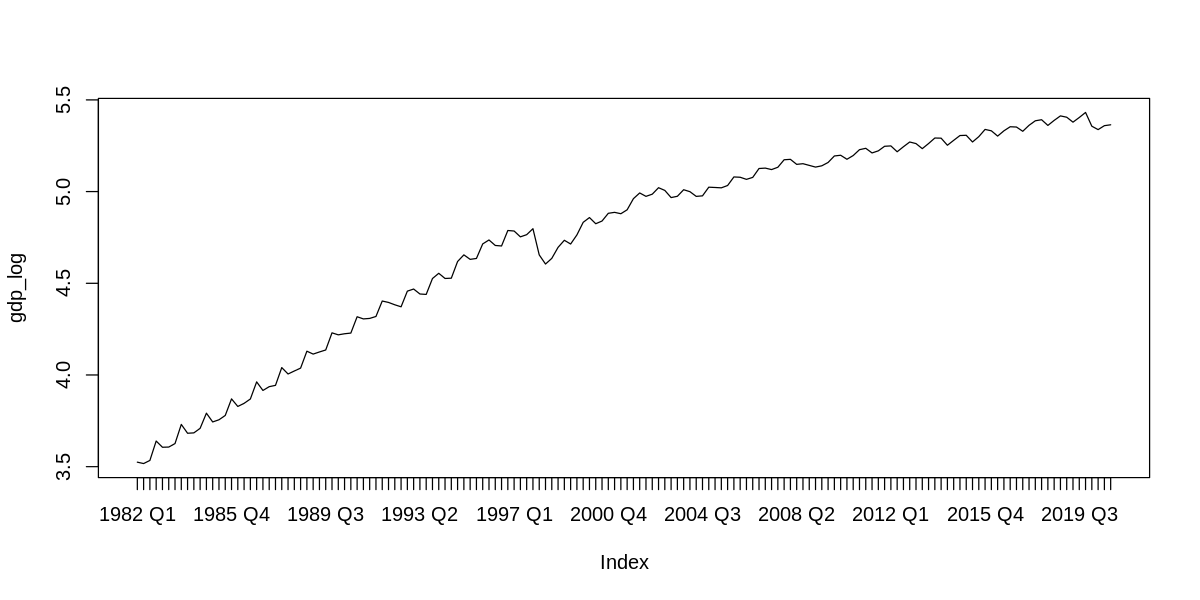

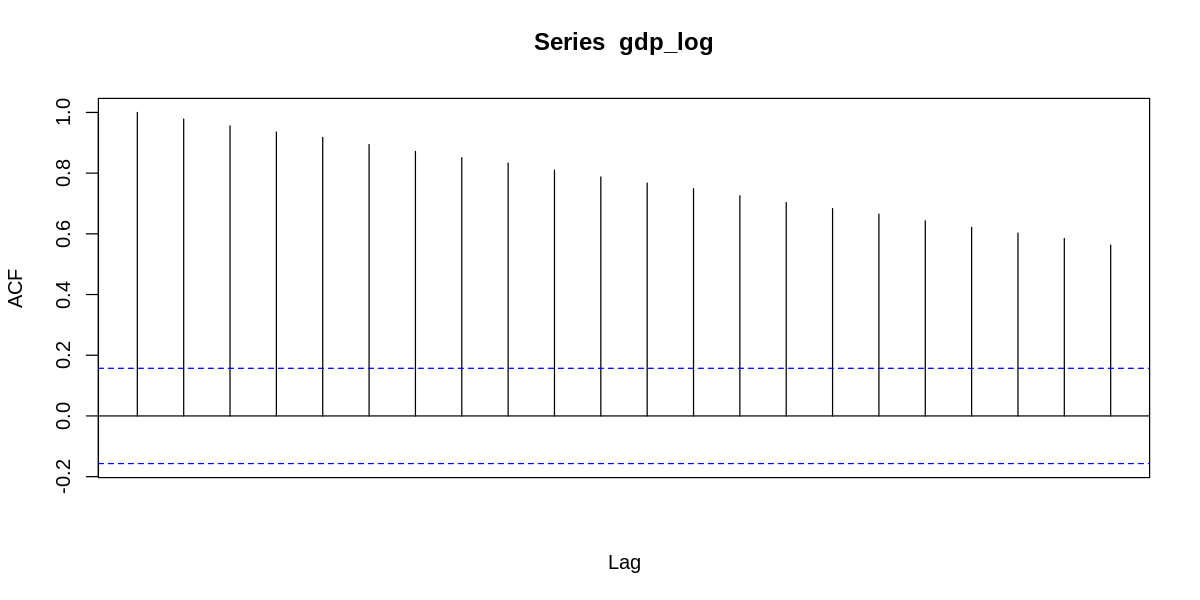

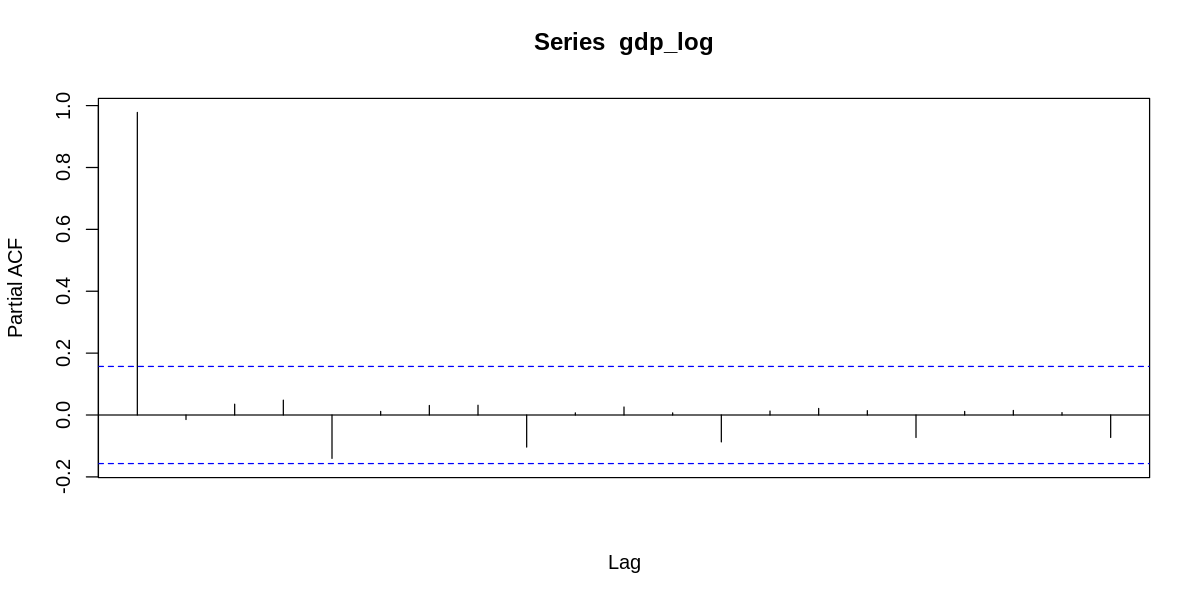

In [ ]:
# GDP 원계열의 로그계열의 시계열도표, 상관도표, 부분상관도표
plot(gdp_log, type='l', xaxt="n")
axis(1, at=seq(1,156), labels=x_title)
abline(h=0, lty=2, col="red")
acf(gdp_log, xaxt="n")
pacf(gdp_log, xaxt="n")

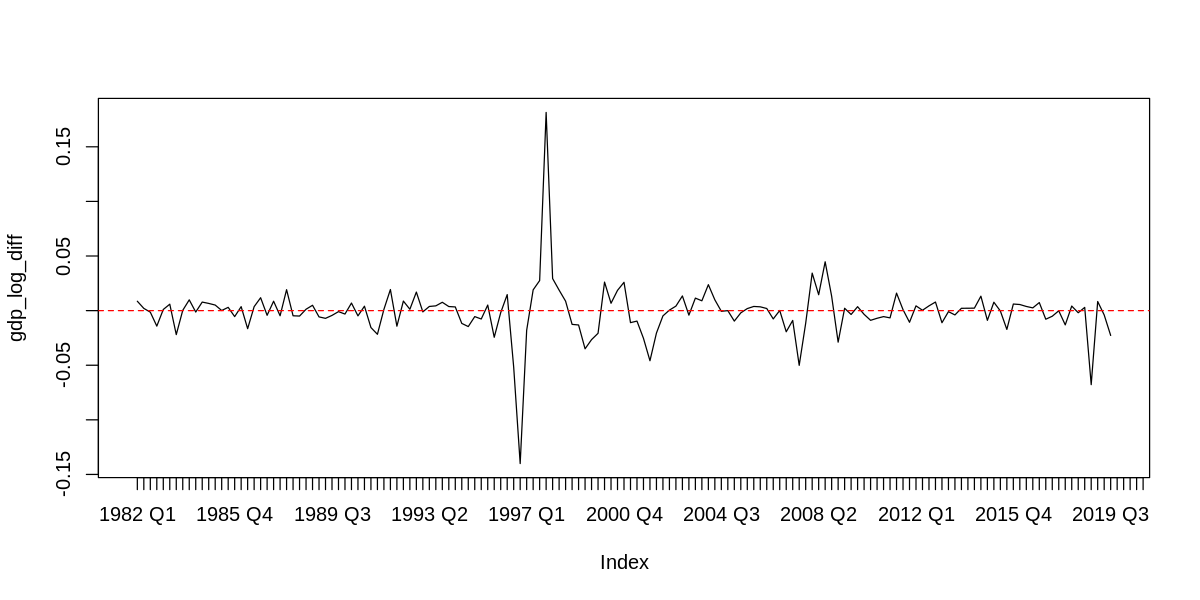

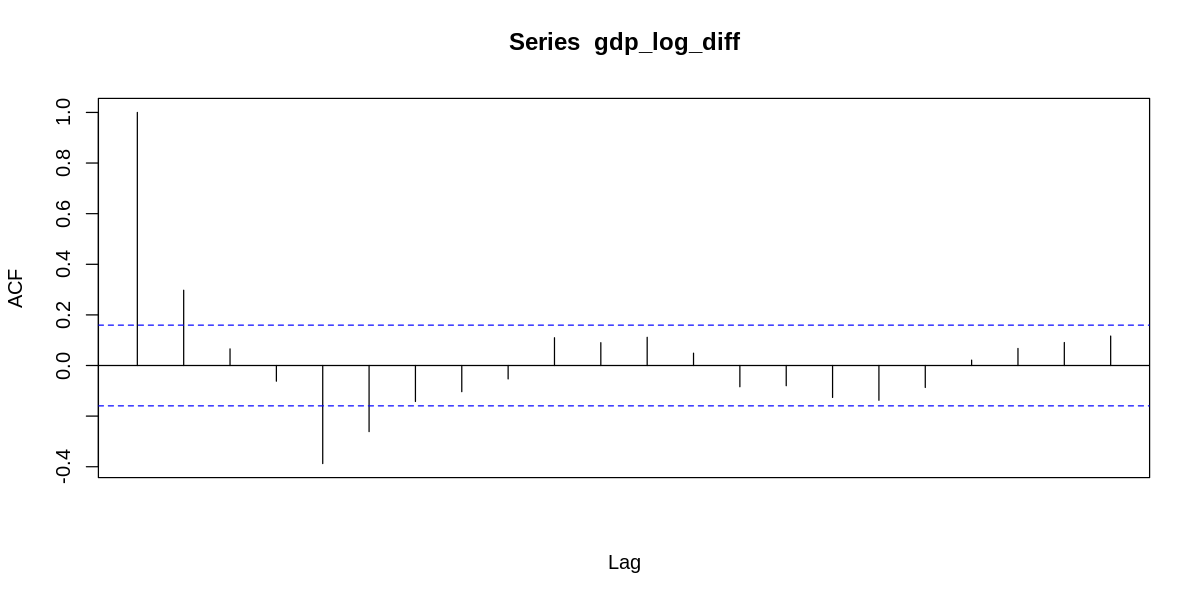

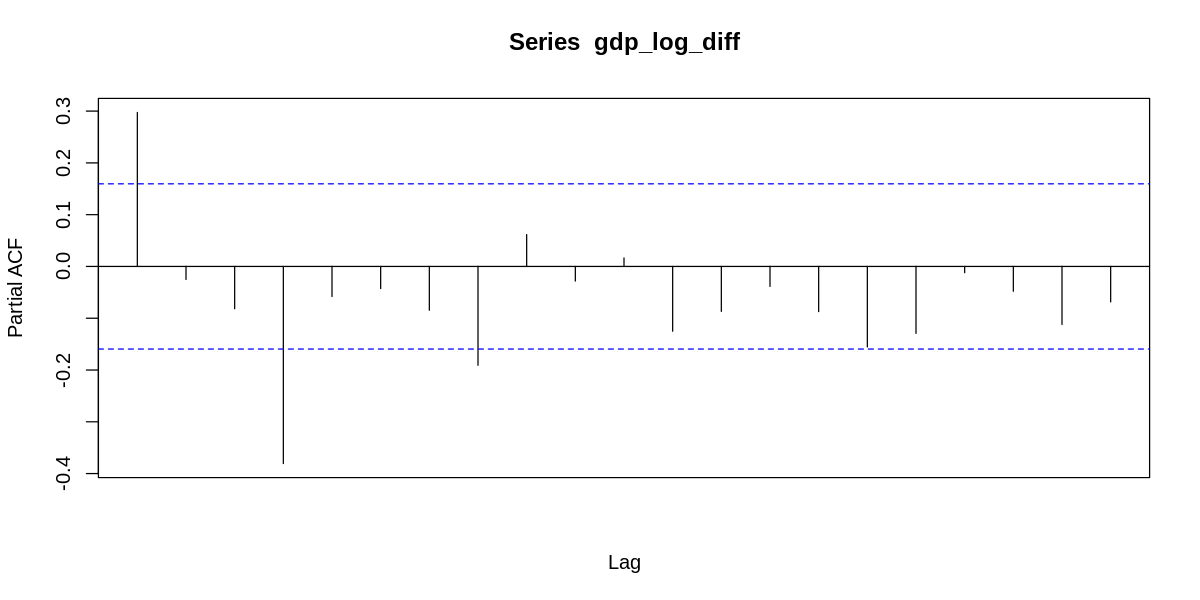

In [ ]:
# GDP 원계열의 로그차분계열의 시계열도표, 상관도표, 부분상관도표
plot(gdp_log_diff, type='l', xaxt="n")
axis(1, at=seq(1,156), labels=x_title)
abline(h=0, lty=2, col="red")
acf(gdp_log_diff, xaxt="n")
pacf(gdp_log_diff, xaxt="n")

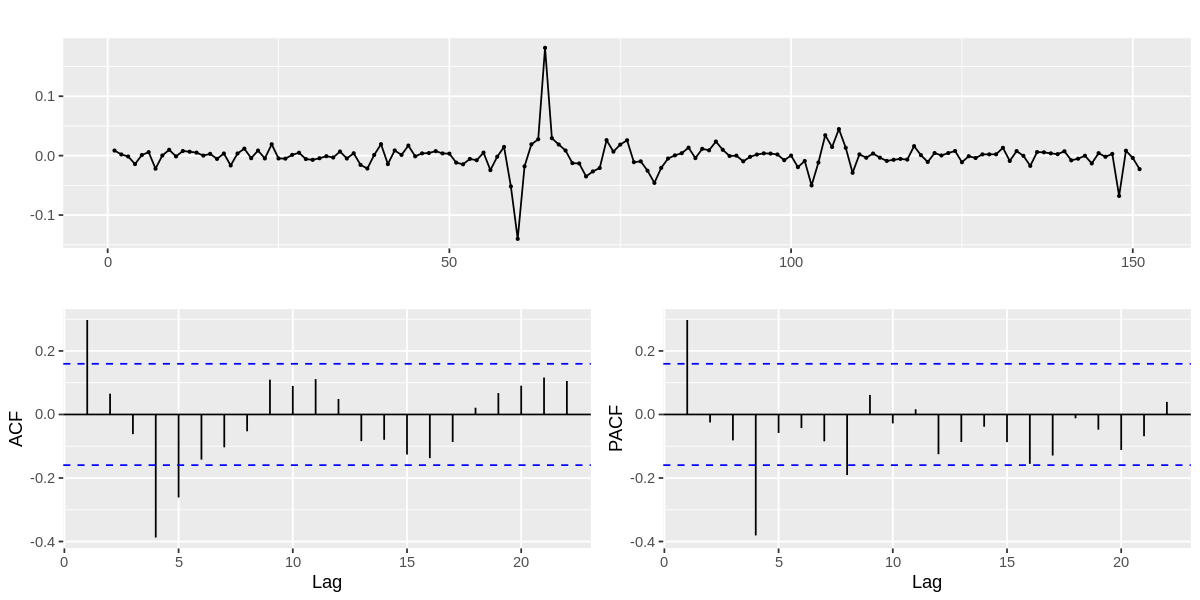

In [ ]:
ggtsdisplay(gdp_log_diff)

In [ ]:
arima_1 = arima(gdp_log_diff, order=c(1,0,0))
arima_2 = arima(gdp_log_diff, order=c(0,0,1))
arima_3 = arima(gdp_log_diff, order=c(1,0,1))
arima_4 = arima(gdp_log_diff, order=c(2,0,0))
arima_5 = arima(gdp_log_diff, order=c(0,0,2))

In [ ]:
arima_1
arima_2
arima_3
arima_4
arima_5


Call:
arima(x = gdp_log_diff, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2973    -0.0010
s.e.  0.0776     0.0026

sigma^2 estimated as 0.0005238:  log likelihood = 356.05,  aic = -706.09


Call:
arima(x = gdp_log_diff, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.2994    -0.0010
s.e.  0.0800     0.0024

sigma^2 estimated as 0.0005252:  log likelihood = 355.85,  aic = -705.71


Call:
arima(x = gdp_log_diff, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.2406  0.0625    -0.0010
s.e.  0.2526  0.2588     0.0026

sigma^2 estimated as 0.0005236:  log likelihood = 356.08,  aic = -704.16


Call:
arima(x = gdp_log_diff, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.3049  -0.0252    -0.0010
s.e.  0.0813   0.0811     0.0026

sigma^2 estimated as 0.0005235:  log likelihood = 356.09,  aic = -704.19


Call:
arima(x = gdp_log_diff, order = c(0, 0, 2))

Coefficients:
         ma1     ma2  intercept
      0.2944  0.0496    -0.0010
s.e.  0.0834  0.1132     0.0025

sigma^2 estimated as 0.0005245:  log likelihood = 355.95,  aic = -703.9

In [ ]:
arima_test1 = arima(gdp_log_diff, order=c(2,0,0))
arima_test2 = arima(gdp_log_diff, order=c(1,0,1))
arima_test1
arima_test2


Call:
arima(x = gdp_log_diff, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.3049  -0.0252    -0.0010
s.e.  0.0813   0.0811     0.0026

sigma^2 estimated as 0.0005235:  log likelihood = 356.09,  aic = -704.19


Call:
arima(x = gdp_log_diff, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.2406  0.0625    -0.0010
s.e.  0.2526  0.2588     0.0026

sigma^2 estimated as 0.0005236:  log likelihood = 356.08,  aic = -704.16

    Point Forecast       Lo 80      Hi 80       Lo 95      Hi 95
152   -0.007470862 -0.03680224 0.02186052 -0.05232934 0.03738761
153   -0.002936935 -0.03353755 0.02766368 -0.04973654 0.04386267
154   -0.001588772 -0.03229908 0.02912154 -0.04855614 0.04537860
155   -0.001187895 -0.03190789 0.02953210 -0.04817007 0.04579428

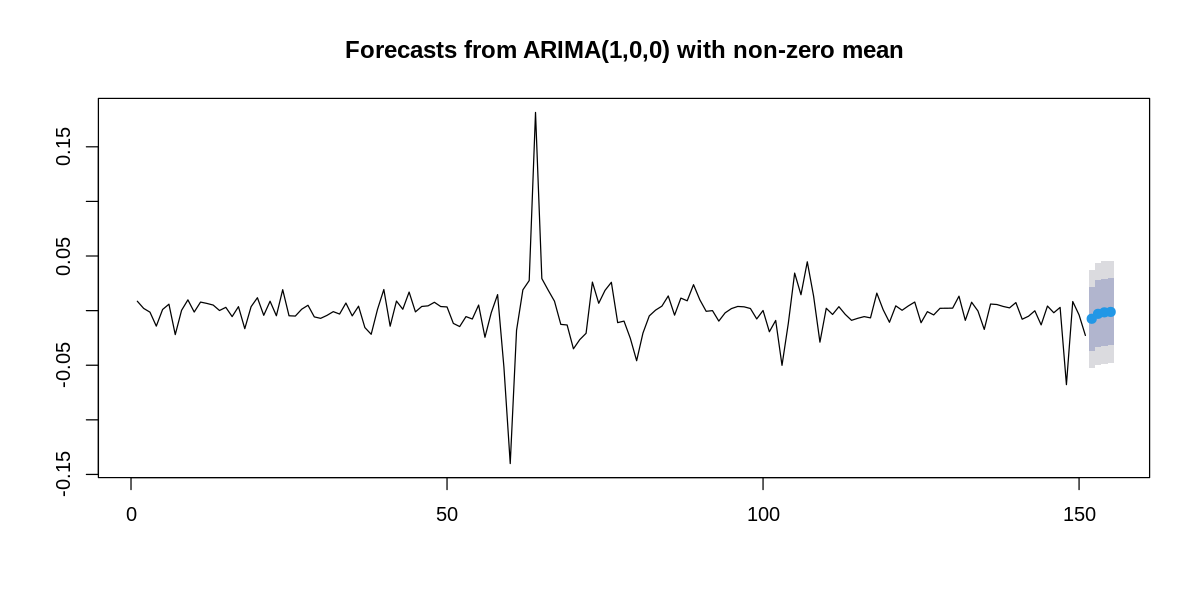

In [ ]:
f4 = forecast(arima_1, h=4)
f4
plot(f4)